<h1 align="center">Física Computacional</h1>
<h1 align="center">Semestre 2025-4</h1>

<h2>Sergio A. Alcalá Corona</h2>
<h2>Rodrigo Vega Vilchis</h2>

---
### Alumno: Juan Alexis Hernández Hernández
---

<h1 align="center">Práctica 3. Integración numérica</h1>

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp

### Integración numérica

#### **1. Regla del trapecio**: El archivo $\texttt{velocidades.txt}$ (adjunto) contiene dos columnas de números la primera representa el tiempo $t$ en segundos y la segunda la $x$-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$. Las primeras líneas se ven así:

$\texttt{0 0}$

$\texttt{1 0.069478}$

$\texttt{2 0.137694}$

$\texttt{3 0.204332}$

$\texttt{4 0.269083}$

$\texttt{5 0.331656}$

#### Escribe un programa para hacer lo siguiente:

#### **(a)** Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección $x$ como una función del tiempo.




In [ ]:
velocidades = pd.read_csv("velocidades.txt",header=None,sep='\t')
velocidades

,0,1
0,0,0.000000
1,1,0.069478
2,2,0.137694
3,3,0.204332
4,4,0.269083
...,...,...
96,96,0.223073
97,97,0.254244
98,98,0.283753
99,99,0.311479


Graficamos para tener un mejor entendimiento de los datos.

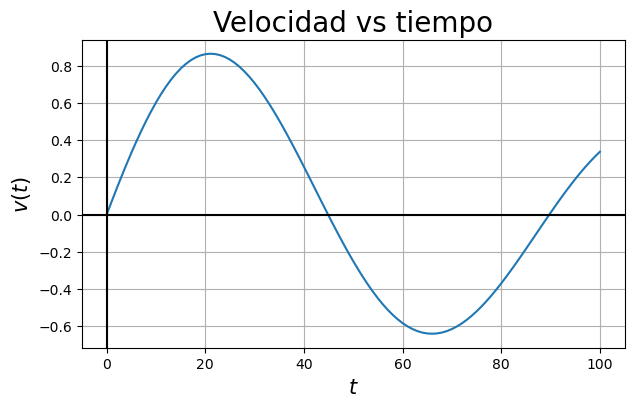

In [ ]:
t = velocidades[0]
v = velocidades[1]

pl.figure(figsize=(7,4))
pl.title('Velocidad vs tiempo',size=20)
pl.xlabel(r'$t$',size=15)
pl.ylabel(r'$v(t)$',size=15)
pl.plot(t,v)
pl.grid()
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')

Podemos ver que hay velocidades negativas, lo que significa que en cierto momento, retrocedió.

Ahora sí, calculamos la integral:

In [ ]:
def f(x):
    return v[int(x)]

def IntTrap(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s = 0
    for k in range(0,N):
        s = s+f(a+k*h)
    return (h/2)*(p+s)

In [ ]:
IntTrap(f,0,100,100)

4.19378900000001

#### **(b)** Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.


La función por sí sola nos dice la velocidad que llevaba en cierto tiempo [ $v(t)$ ]. La integral en cada punto (es decir, a cierto tiempo) nos dice la distancia que llevaba [ $d(t)$ ]. Entonces guardemos cada valor de la integral en cada uno de los tiempos.

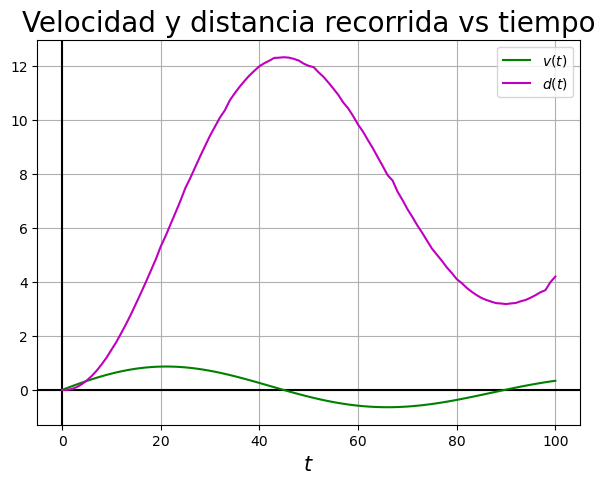

In [ ]:
d = []
for i in range(101):
    d.append(IntTrap(f,0,i,100))

pl.figure(figsize=(7,5))
pl.title('Velocidad y distancia recorrida vs tiempo',size=20)
pl.xlabel(r'$t$',size=15)
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.grid()
pl.plot(t,v,'g',label=r'$v(t)$')
pl.plot(t,d,'m',label=r'$d(t)$')
pl.legend()

#### **2. Integración numérica**

#### **(a)** Escribe un programa para calcular un valor aproximado para la integral

$$\int_0^2 (x^4-2x+1)\,dx$$

#### utilizando tanto la **regla del trapecio** como la **regla de Simpson** con 10 divisiones.

In [ ]:
def f(x):
    return x**4 - 2*x + 1

In [ ]:
def IntTrap(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s = 0
    for k in range(0,N):
        s = s+f(a+k*h)
    return (h/2)*(p+s)

In [ ]:
def IntSimp(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

In [ ]:
IntTrap(f,0,2,10)

3.053280000000001

In [ ]:
IntSimp(f,0,2,10)

4.400426666666667

#### **(b)** Ejecuta el programa y compara tu resultado con el valor correcto conocido de $4,4$. ¿Cuál es el error en tu cálculo?

In [ ]:
error_trap = 4.4-IntTrap(f,0,2,10)
error_simp = 4.4-IntSimp(f,0,2,10)

print("El error en el método del trapecio fue de:",error_trap)
print("y en el de Simspon fue de:",error_simp)

El error en el método del trapecio fue de: 1.3467199999999995
y en el de Simspon fue de: -0.0004266666666667973


#### **(c)** Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado?. ¿Cómo se comparan los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [ ]:
print("Con 100 divisiones, el método del trapecio nos da un valor de:",IntTrap(f,0,2,100),"mientras que con el de Simpson el valor es:",IntSimp(f,0,2,100))

Con 100 divisiones, el método del trapecio nos da un valor de: 2.280533328 mientras que con el de Simpson el valor es: 4.400000042666668


In [ ]:
print("Con 1000 divisiones, el método del trapecio nos da un valor de:",IntTrap(f,0,2,1000),"mientras que con el de Simpson el valor es:",IntSimp(f,0,2,1000))

Con 1000 divisiones, el método del trapecio nos da un valor de: 2.2080053333328 mientras que con el de Simpson el valor es: 4.400000000004267


De acuerdo a mis resultados, el método de Simpson funciona muy mal para esa función, y a más número de divisiones, más se aleja del valor real (cada vez es un número menor).

#### **3. El límite de difracción de un telescopio**: Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción está dada por:

$$I(r) = \left( \frac{J_1(kr)}{kr} \right)^2$$

#### donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k = \frac{2\pi}{\lambda}$, y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están definidas por:

$$J_m(x) = \frac{1}{\pi} \int_0^\pi Cos\left( m\theta - xSin\theta \right)\,d\theta$$

#### donde $m$ es un entero no negativo y $x \geq 0$.

#### **(a)** Escribe una función $\texttt{J(m,x)}$ que calcule el valor de $J_m(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una función de $x$ (de $x = 0$ a $x = 20$).

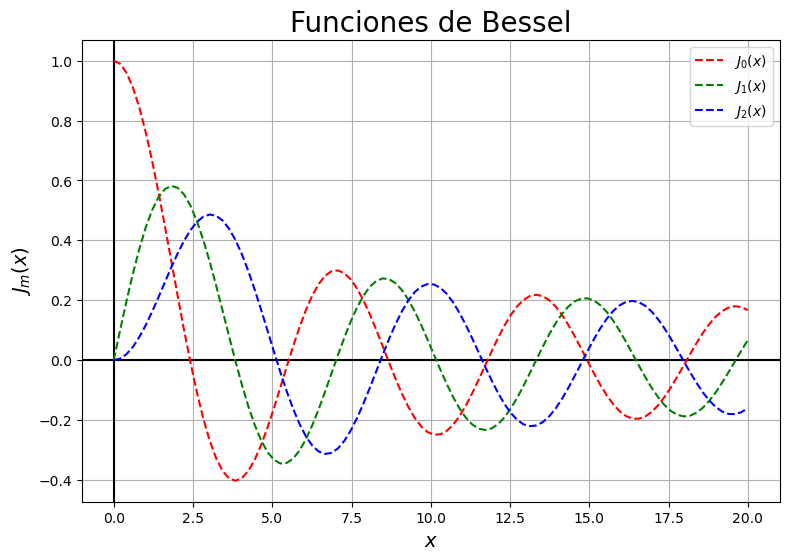

In [ ]:
def IntSimp(f,a,b,N):
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

# Función de Bessel utilizando nuestra regla de Simpson
def Bessel(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    return (1/np.pi)*IntSimp(f,0,np.pi,1000)

x = np.linspace(0,20,100)
pl.figure(figsize=(9,6))
pl.title('Funciones de Bessel',size=20)
pl.xlabel(r'$x$',size=14)
pl.ylabel(r'$J_m(x)$',size=14)
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.grid()
pl.plot(x,Bessel(0,x),'r--',label=r'$J_0(x)$')
pl.plot(x,Bessel(1,x),'g--',label=r'$J_1(x)$')
pl.plot(x,Bessel(2,x),'b--',label=r'$J_2(x)$')
pl.legend()

#### **(b)** Compara tus resultados con los proporcionados con la biblioteca de $\texttt{scipy}$ que implementa la regla de Simpson.

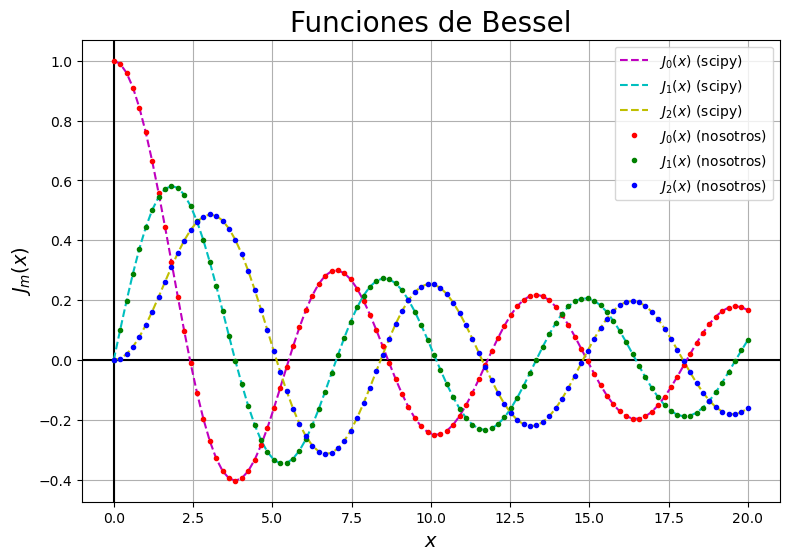

In [ ]:
# Función de Bessel utilizando la regla de Simpson de la paquería scipy
def Bessel2(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    z = np.linspace(0,np.pi,100)
    return (1/np.pi)*sp.integrate.simpson(f(z),z)

# Dado que devuelve escalares, guardemos cada valor en un arreglo
x = np.linspace(0,20,100)
J0 = []
J1 = []
J2 = []
for i in x:
    J0.append(Bessel2(0,i))
    J1.append(Bessel2(1,i))
    J2.append(Bessel2(2,i))

pl.figure(figsize=(9,6))
pl.title('Funciones de Bessel',size=20)
pl.xlabel(r'$x$',size=14)
pl.ylabel(r'$J_m(x)$',size=14)
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.grid()
pl.plot(x,J0,'m--',label=r'$J_0(x)$ (scipy)')
pl.plot(x,J1,'c--',label=r'$J_1(x)$ (scipy)')
pl.plot(x,J2,'y--',label=r'$J_2(x)$ (scipy)')
pl.plot(x,Bessel(0,x),'r.',label=r'$J_0(x)$ (nosotros)')
pl.plot(x,Bessel(1,x),'g.',label=r'$J_1(x)$ (nosotros)')
pl.plot(x,Bessel(2,x),'b.',label=r'$J_2(x)$ (nosotros)')
pl.legend()

Ambos son muy parecidos

In [ ]:
Bessel(0,x)

array([ 1.        ,  0.98982296,  0.95960236,  0.91025932,  0.84329426,
        0.7607362 ,  0.66507419,  0.55917343,  0.44617906,  0.32941099,
        0.21225348,  0.09804337, -0.01003911, -0.10907316, -0.19649035,
       -0.27015437, -0.32842509, -0.37020465, -0.39496415, -0.40275042,
       -0.39417246, -0.37036864, -0.33295586, -0.2839627 , -0.22574926,
       -0.16091667, -0.09220966, -0.02241582,  0.04573474,  0.10966581,
        0.16704398,  0.21585707,  0.25447924,  0.28172071,  0.29686048,
        0.29966114,  0.29036549,  0.26967541,  0.23871408,  0.19897324,
        0.15224768,  0.10055964,  0.04607618, -0.00897731, -0.06240414,
       -0.11212048, -0.15623365, -0.19311159, -0.22144096, -0.24027192,
       -0.2490481 , -0.24762079, -0.23624704, -0.21557217, -0.18659738,
       -0.15063411, -0.10924706, -0.06418831, -0.01732511,  0.02943565,
        0.07422325,  0.11527649,  0.15101148,  0.18008152,  0.20142671,
        0.21431157,  0.21834926,  0.2135118 ,  0.2001259 ,  0.17

In [ ]:
np.array(J0)

array([ 1.        ,  0.98982296,  0.95960236,  0.91025932,  0.84329426,
        0.7607362 ,  0.66507418,  0.55917342,  0.44617905,  0.32941098,
        0.21225346,  0.09804335, -0.01003913, -0.10907319, -0.19649039,
       -0.27015442, -0.32842516, -0.37020472, -0.39496425, -0.40275054,
       -0.3941726 , -0.37036881, -0.33295606, -0.28396293, -0.22574953,
       -0.16091699, -0.09221003, -0.02241625,  0.04573425,  0.10966525,
        0.16704335,  0.21585636,  0.25447843,  0.2817198 ,  0.29685946,
        0.29966   ,  0.29036422,  0.269674  ,  0.23871252,  0.19897152,
        0.15224578,  0.10055754,  0.04607388, -0.00897983, -0.0624069 ,
       -0.11212348, -0.15623693, -0.19311515, -0.22144482, -0.2402761 ,
       -0.24905263, -0.24762568, -0.23625232, -0.21557785, -0.18660349,
       -0.15064067, -0.1092541 , -0.06419585, -0.01733318,  0.02942702,
        0.07421404,  0.11526667,  0.15100102,  0.18007038,  0.20141487,
        0.21429899,  0.21833591,  0.21349765,  0.2001109 ,  0.17

#### **(c)** Escribe un segundo programa que haga una gráfica de densidad ($\texttt{density plot}$) de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda = 500\,nm$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1\,\mu m$.

#### **Hint 1**: Puede resultarte útil saber que $\lim_{x \to 0} \frac{J_1(x)}{x} = \frac{1}{2}$

#### **Hint 2**: El punto central en el patrón de difracción es tan brillante que puede resultar difícil ver los anillos que lo rodean en la pantalla de la computadora; para solucionar esta situación, puedes usar el esquema de colores $\texttt{"hot"}$, que funciona bien. Tu gráfica debería verse algo así:

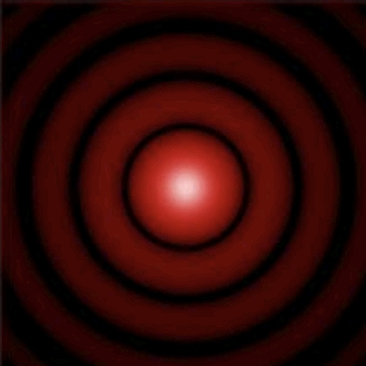


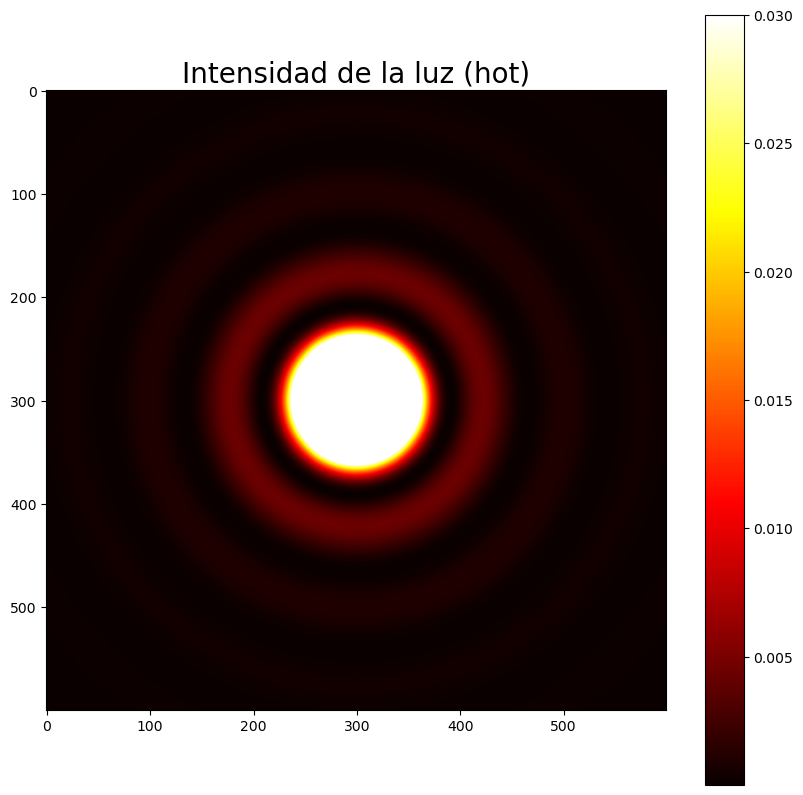

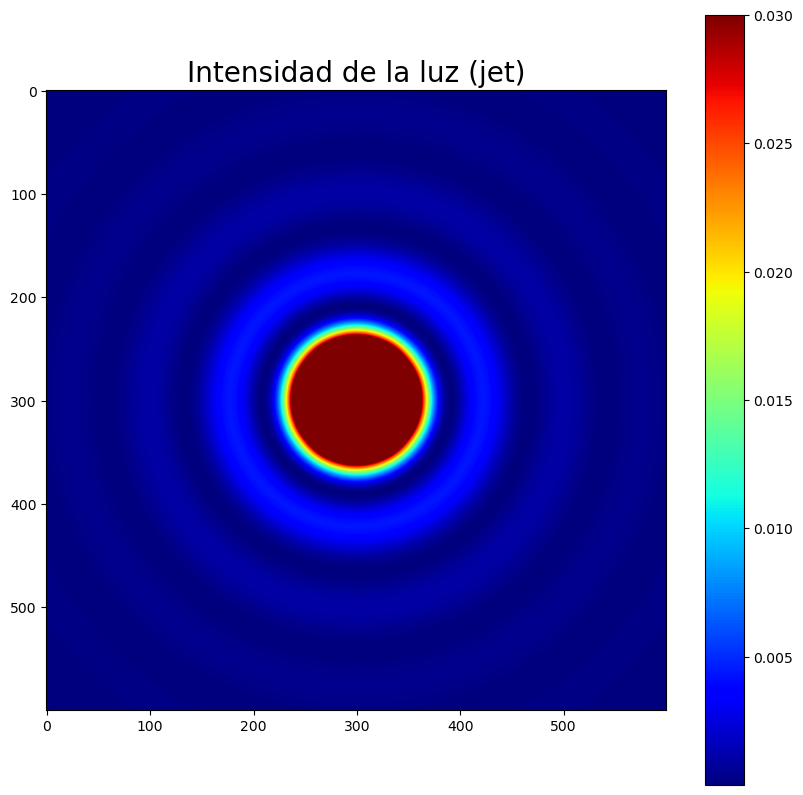

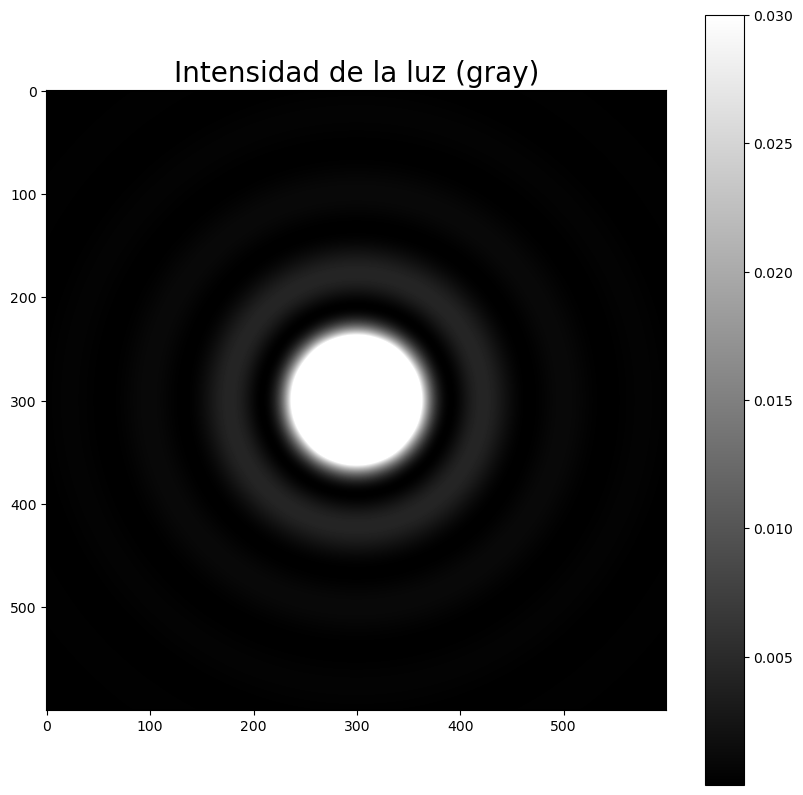

In [ ]:
# Utilizamos la integral de Simpsion que definimos en el inciso
def IntSimp(f,a,b,N): # N es el refinamiento de la integral
    h = (b-a)/N
    p = f(a)+f(b)
    s1 = 0
    s2 = 0
    for k in range(1,int(N/2)+1):
        s1 = s1+f(a+(2*k-1)*h)
    for k in range(1,int(N/2)):
        s2 = s2+f(a+2*k*h)
    return (h/3)*(p + 4*s1 + 2*s2)

def Bessel(m,x):
    def f(T):
        return np.cos(m*T - x*np.sin(T))
    return (1/np.pi)*IntSimp(f,0,np.pi,1000)

def I(r):
  L = 500*10**(-9)
  k = 2*np.pi/L
  if k*r == 0:
    return 1/2
  else:
    j1 = Bessel(1,k*r)
    return (j1/(k*r))**2

# Número de valores (que va a ser la resolución de nuestra gráfica)
N = 600

# Dado que nos pide un máx de r = 1 micrómetro, consideramos:
xs = np.linspace(-1*10**(-6),1*10**(-6),N)
ys = np.linspace(-1*10**(-6),1*10**(-6),N)

# La imagen se va a crear a partir de un arreglo con las intensidades
num = np.zeros((N,N))

for i in range(N):
  x = xs[i] # Valor de x
  for j in range(N):
    y = ys[j] # Valor de y
    r = (x**2 + y**2)**(1/2) # Radio
    num[j,i] = I(r)

pl.figure(figsize=(10,10))
pl.title("Intensidad de la luz (hot)",fontsize=20)
colorbar = pl.imshow(num,cmap='hot',vmax=0.03)
pl.colorbar(colorbar)

pl.figure(figsize=(10,10))
pl.title("Intensidad de la luz (jet)",fontsize=20)
colorbar = pl.imshow(num,cmap='jet',vmax=0.03)
pl.colorbar(colorbar)

pl.figure(figsize=(10,10))
pl.title("Intensidad de la luz (gray)",fontsize=20)
colorbar = pl.imshow(num,cmap='gray',vmax=0.03)
pl.colorbar(colorbar)

#### **4. Capacidad calorífica de un sólido**: La *teoría de sólidos de Debye* establece que la *capacidad calorífica* de un sólido a una temperatura $T$ está dada por:

$$C_V(T) = 9\,V\,\rho\,k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}\,dx$$

#### donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_B$ es la constante de Boltzmann y $\theta_D$ es la *temperatura de Debye*, una propiedad del material que depende de su densidad y de la velocidad del sonido en el sólido.

#### **(a)** Escribe una función $\texttt{Cv(T)}$ que calcule $C_V$ para un valor dado de temperatura, de una muestra que consta de $1000\,cm^3$ de aluminio sólido, con densidad numérica $\rho = 6.022 \times 10^{28}\,m^{-3}$ y una temperatura de Debye de $\theta_D = 428\,\text{K}$. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N = 50$ *puntos de muestreo*.

In [ ]:
# Definimos la cuadratura gaussiana
def cuadgauss(f,a,b,N):
    x,w = np.polynomial.legendre.leggauss(N)
    W = (1/2)*(b-a)*w
    X = (1/2)*(b-a)*x + (1/2)*(b+a)
    s = 0
    for i in range(N):
      s = s+( W[i]*f(X[i]) )
    return s

# Defininimos la función para calcular la capacidad calorífica
def Cv(T):
  V = 1000*10**(-6)
  rho = 6.022*10**(28)
  k = 1.380649*10**(-23) # J/K
  theta = 428
  def f(x): # La función a integrar
    return ((x**4)*np.exp(x)) / ((np.exp(x)-1)**2)
  return (9*V*rho*k*((T/theta)**3))*cuadgauss(f,0,theta/T,50)

In [ ]:
T = 139
print("La capacidad calorífica de un sólido de 1,000 cmˆ3 a una temperatura de:",T,"K es de:",Cv(T),"J/K")

La capacidad calorífica de un sólido de 1,000 cmˆ3 a una temperatura de: 139 K es de: 1620.2834724970746 J/K


#### **(b)** Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura, desde $T = 5\,K$ hasta $T = 500\,K$.

Text(5, -260, '5')

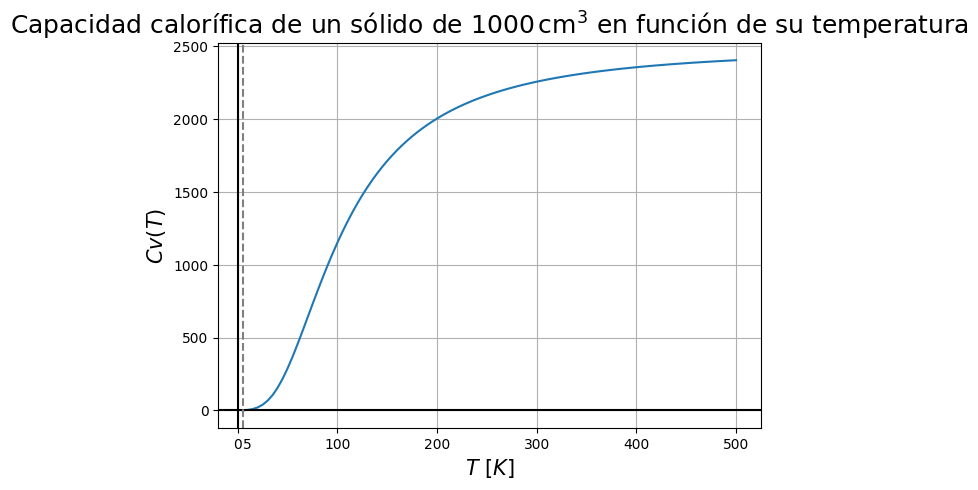

In [ ]:
T = np.linspace(5,500,100)
C = []
for i in T:
  C.append(Cv(i))

pl.figure(figsize=(7,5))
pl.title(r'Capacidad calorífica de un sólido de $1000\,\mathrm{cm}^3$ en función de su temperatura',size=18)
pl.xlabel(r'$T\,\,[K]$',size=15)
pl.ylabel(r'$Cv(T)$',size=15)
pl.plot(T,C)
pl.grid()
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.axvline(x=5.0,ymin=0.0,ls='--',color='gray')
pl.text(5,-260,'5')

#### **5. Atracción gravitacional de una lámina uniforme**: Una lámina de metal cuadrada uniforme flota inmóvil en el espacio:
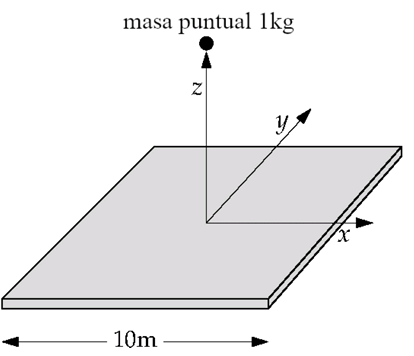

#### La lámina mide $10\,m$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

#### **(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1\,kg$ a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ está dada por:

$$F_z = G\sigma z \int\int_{-L/2}^{L/2} \frac{1}{(x^2+y^2+z^2)^{3/2}}\,dxdy$$


donde $G = 6.674 \times 10^{-11}\,m^3\,kg^{-1}\,s^{-2}$ es la constante gravitacional de Newton, y $\sigma$ es la masa por unidad de área de la hoja.

#### **(b)** Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z = 0$ hasta $z = 10\,m$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

$$I = \approx \sum_{i=1}^{N} \sum_{j=1}^{N} \omega_i\omega_jf(x_i,y_j)$$
con 100 puntos de muestra a lo largo de cada eje.

In [ ]:
# Definimos la cuadratura gaussiana doble
def cuadgauss2(f,a,b,c,d,N):
    x,w = np.polynomial.legendre.leggauss(N)
    Wx = (1/2)*(b-a)*w
    Wy = (1/2)*(d-c)*w
    X = (1/2)*(b-a)*x + (1/2)*(b+a)
    Y = (1/2)*(d-c)*x + (1/2)*(d+c)
    s = 0
    m = 0
    for i in range(N):
      for j in range(N):
        s = s + Wx[i]*Wy[j]*f(X[i],Y[j])
    return s

# Defininimos la función para calcular la fuerza en z
def Fz(z):
  G = 6.674*10**(-11)
  sigma = (10*1000)/(10*10) # masa/área = 10 toneladas/cuadrado lado 10 m
  def f(x,y): # La función a integrar
    return 1/((x**2+y**2+z**2)**(3/2))
  return G*sigma*z*cuadgauss2(f,-5,5,-5,5,100) # L/2 = lado/2 = 5

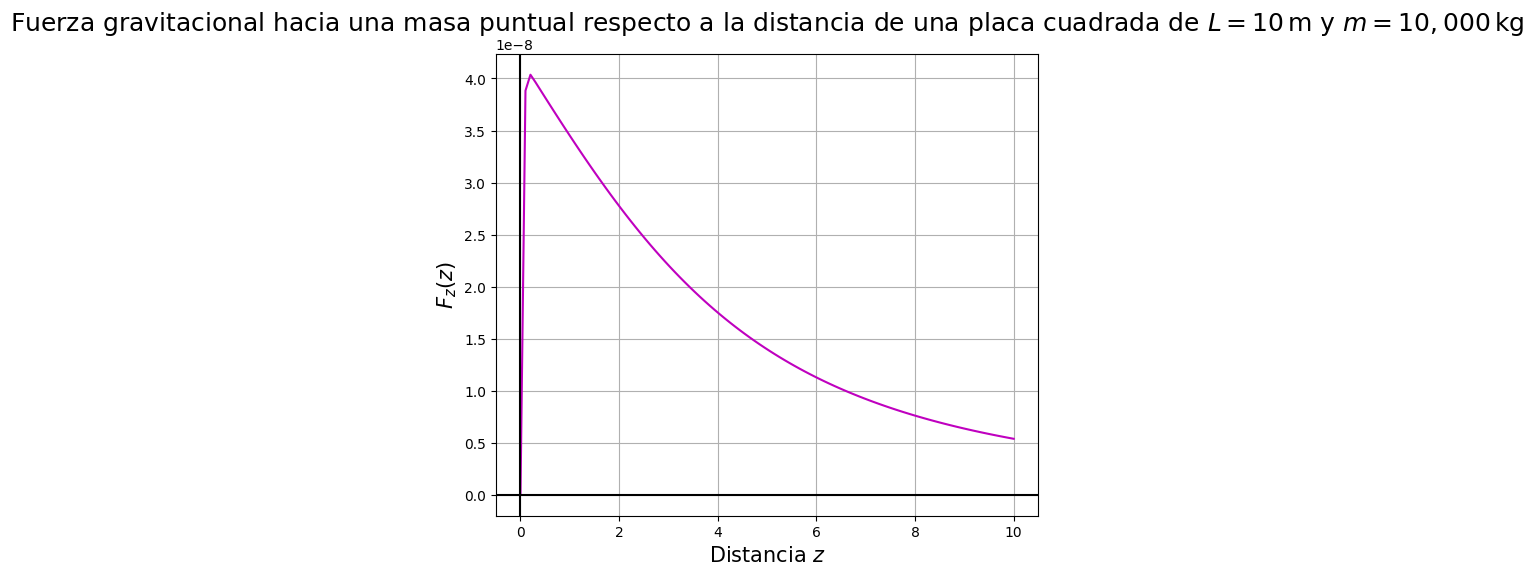

In [ ]:
z = np.linspace(0,10,100)
g = []
for i in z:
  g.append(Fz(i))

pl.figure(figsize=(7,6))
pl.title(r'Fuerza gravitacional hacia una masa puntual respecto a la distancia de una placa cuadrada de $L=10\,\mathrm{m}$ y $m = 10,000\,\mathrm{kg}$',size=18)
pl.xlabel(r'Distancia $z$',size=15)
pl.ylabel(r'$F_z(z)$',size=15)
pl.plot(z,g,'m')
pl.grid()
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')

#### **(c)** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto físico real, sino un artefacto numérico causado por la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.

#### Este cálculo puede considerarse como un modelo de la atracción gravitacional de una galaxia. La mayor parte de la masa de una galaxia espiral (como nuestra Vía Láctea) se encuentra en un plano o disco delgado que pasa por el centro galáctico, y la atracción gravitacional ejercida por ese plano sobre cuerpos fuera de la galaxia se puede calcular con los métodos que hemos empleado aquí.




#### **6. Diferenciación numérica**: Crea una función $f(x)$ que devuelva $1 + \frac{1}{2} tanh(2x)$, luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2 \leq x \leq 2$.
#### Después, calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: usa la función $\texttt{tanh}$ del paquete $\texttt{math}$).


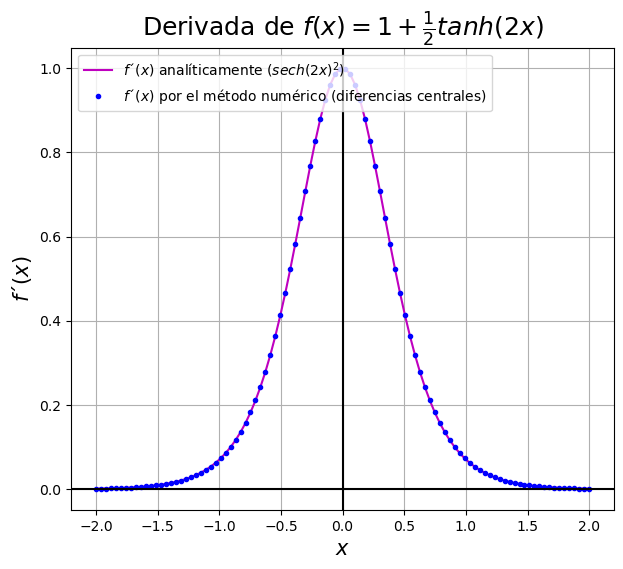

In [ ]:
def f(x):
    return 1 + (1/2)*np.tanh(2*x)

def difcen(f,x,h):
    return (1/h)*(f(x+h/2) - f(x-h/2))

x = np.linspace(-2,2,100)
fnumerico = difcen(f,x,0.001)

def f_analitica(x): # f'(x) = sech(2x)**2
    return (1/np.cosh(2*x))**2

fanalitico = f_analitica(x)

pl.figure(figsize=(7,6))
pl.title(r'Derivada de $f(x) = 1+\frac{1}{2}tanh(2x)$',size=18)
pl.xlabel(r'$x$',size=15)
pl.ylabel(r'$f´(x)$',size=15)
pl.plot(x,fanalitico,'m',label=r'$f´(x)$ analíticamente ($sech(2x)^2$)')
pl.plot(x,fnumerico,'b.',label=r'$f´(x)$ por el método numérico (diferencias centrales)')
pl.grid()
pl.axhline(y=0.0,xmin=0.0,color='black')
pl.axvline(x=0.0,ymin=0.0,color='black')
pl.legend(loc=2)

#### **7. Campo eléctrico de una distribución de cargas**: Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiente.

#### Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi = \frac{q}{4\pi \varepsilon_0 r}$ y el campo eléctrico es $\vec{E} = -\nabla \phi$.


#### **(a)** Suponiendo que tienes dos cargas, de $+1\,\mathrm{C}$ y $-1\,\mathrm{C}$ (respectivamente), separadas $10\,\mathrm{cm}$. Calcula el potencial eléctrico resultante en un plano cuadrado de $1\,\mathrm{m} \times 1\,\mathrm{m}$ que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a $1\,\mathrm{cm}$ en una cuadrícula y haz una visualización en la pantalla del potencial usando un gráfico de densidad.


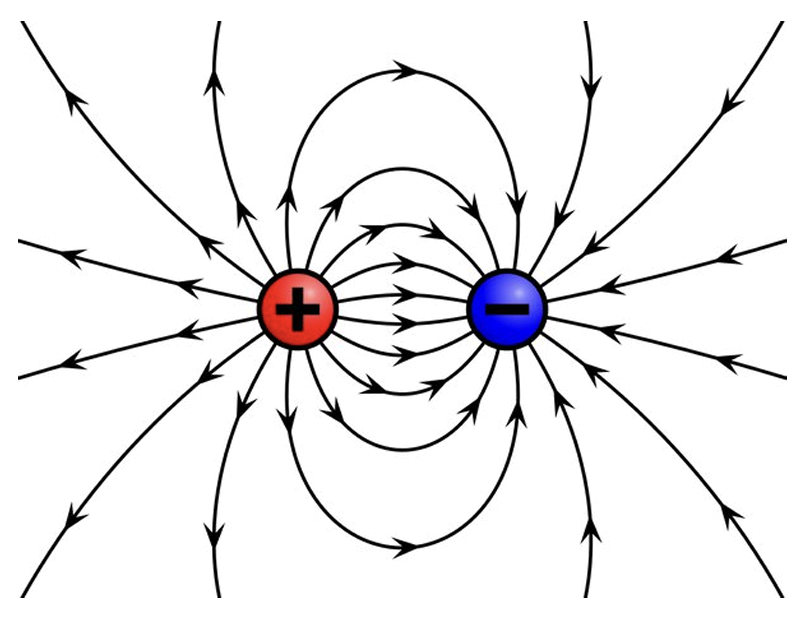

A diferencia del ejercicio del patrón de difracción, aquí nos auxiliaremos del $\texttt{np.meshgrid}$ para usar las ventajas de operar directemente con arreglos y ya no estar iterando como el programa hecho en ese ejercicio (el día de la ayudantía ya había realizado ese ejercicio pero no este; y resulta mucho más fácil hacerlo de esta manera).

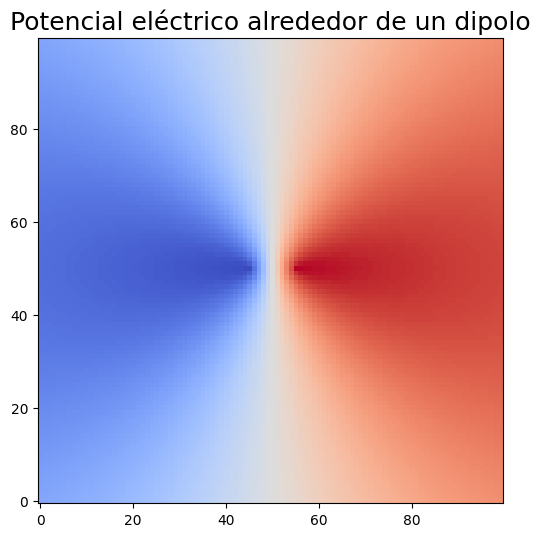

In [ ]:
# Definimos una función para calcular el potencial eléctrico a una
# distancia r de una carga puntual en el origen
def V(q,r):
  e0 = 8.854e-12
  return q/(4*np.pi*e0*r)

# Se hará uso del principio de superposición, así que el potencial
# resultante será la suma de cada una.

xs = np.arange(-0.5,0.5,0.01) # 1cm = 0.01m
ys = np.arange(-0.5,0.5,0.01)
x,y = np.meshgrid(xs,ys)
# Dado que nuestra función es para cargas en el origen, y aquí son 2 y
# están separadas 0.1m, entonces ubicamos a una en x1=-0.05m, y2=0m y la
# otra en x2=0.05m, y=0m
r1 = np.sqrt((x-0.05)**2 + (y)**2) +5 # "Inflamos" los valores para
r2 = np.sqrt((x+0.05)**2 + (y)**2) +5 # que se vea mejor la imagen
V1 = V(1,r1)
V2 = V(-1,r2)
V_total = V1+V2

pl.figure(figsize=(6,8))
pl.title("Potencial eléctrico alrededor de un dipolo",size=18)
pl.imshow(V_total,cmap='coolwarm',origin='lower')

#### **(b)** Ahora calcula las derivadas parciales del potencial con respecto a $x$ y $y$, para encontrar el campo eléctrico en el plano $xy$ y realiza una visualización de dicho campo.

#### Lo anterior es un poco más complicado que visualizar el potencial, porque el campo eléctrico tiene **magnitud y dirección**. Una forma de hacerlo podría ser hacer dos gráficos de densidad: uno para la magnitud y otro para la dirección, este último usando el esquema de color $\texttt{hsv}$ en $\texttt{pylab}$, que es un esquema de arcoíris que pasa por todos los colores pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que dan la vuelta al círculo completo y terminan donde comenzaron. Una visualización más sofisticada podría usar el objeto de flecha del paquete $\texttt{visual}$, dibujando una cuadrícula de flechas con la dirección y la longitud elegidas para representar el campo.


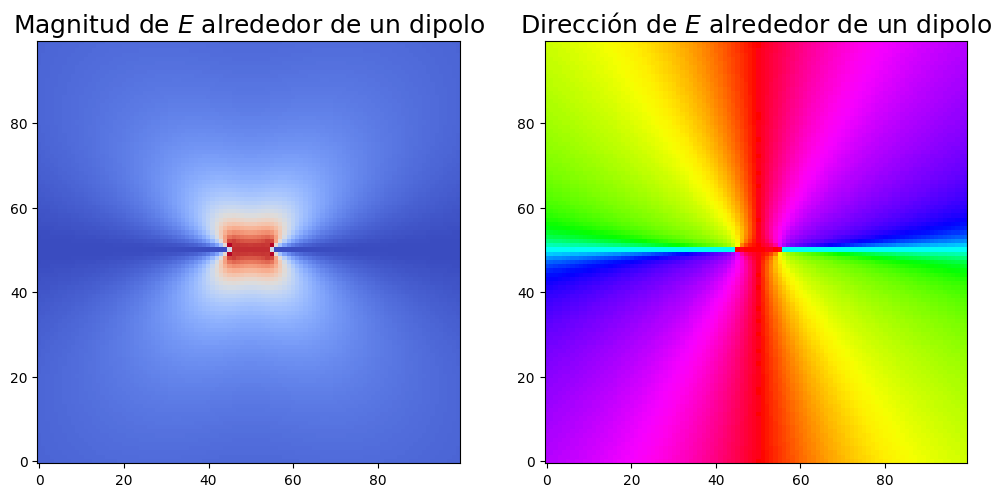

In [ ]:
# Usaremos la forma de diferenciación central para cada coordenada
def fx(f,x,y):
  h = 0.01
  return (1/h)*(f(x+h/2,y)-f(x-h/2,y))

def fy(f,x,y):
  h = 0.01
  return (1/h)*(f(x,y+h)-f(x,y-h))

# Ahora cada carga tendrá una función de potencial propia
def V1(x,y):
  q = 1
  r = np.sqrt((x-0.05)**2 + (y)**2) +5
  e0 = 8.854e-12
  return q/(4*np.pi*e0*r)

def V2(x,y):
  q = -1
  r = np.sqrt((x+0.05)**2 + (y)**2) +5
  e0 = 8.854e-12
  return q/(4*np.pi*e0*r)

xs = np.arange(-0.5,0.5,0.01) # 1cm = 0.01m
ys = np.arange(-0.5,0.5,0.01)
x,y = np.meshgrid(xs,ys)
# Volvemos a usar el principio de superposición
Ex = -fx(V1,x,y)-fx(V2,x,y)
Ey = -fy(V1,x,y)-fy(V2,x,y)
ET_magnitud = np.sqrt(Ex**2+Ey**2)
ET_direccion = np.arctan2(Ey,Ex)

pl.figure(figsize=(12,10))
pl.subplot(121)
pl.title(r"Magnitud de $E$ alrededor de un dipolo",size=18)
pl.imshow(ET_magnitud,cmap='coolwarm',origin='lower')
pl.subplot(122)
pl.title(r"Dirección de $E$ alrededor de un dipolo",size=18)
pl.imshow(ET_direccion,cmap='hsv',origin='lower')

Text(0.5, 1.0, 'streamplot')

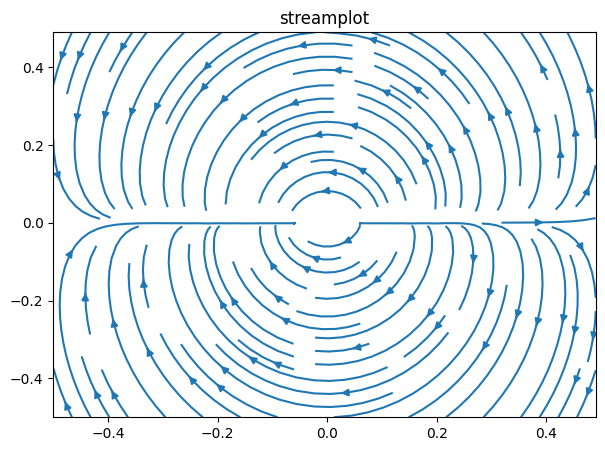

In [ ]:
# De la ayudantía:
fig, (ax1) = pl.subplots(1,figsize = (7,5))

ax1.streamplot(x,y,Ex,Ey)
ax1.set_title('streamplot')

#### **(c)** Ahora supongamos que tenemos una distribución continua de carga sobre un cuadrado de $L \times L$. La densidad de carga en $\frac{\mathrm{C}}{\mathrm{m}^2}$ es:

$$\sigma(x, y) = q_0 \sin\left(\frac{2\pi x}{L}\right) \sin\left(\frac{2\pi y}{L}\right)$$

#### Calcula y visualiza el campo eléctrico resultante en puntos espaciados a $1\,\mathrm{cm}$ en un metro cuadrado del plano $xy$, para el caso donde $L = 10\,\mathrm{cm}$. La distribución de carga está centrada en el medio del área visualizada y $q_0 = 100\,\frac{\mathrm{C}}{\mathrm{m}^2}$.

#### Tendrás que realizar una integral doble sobre $x$ y $y$, y luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.


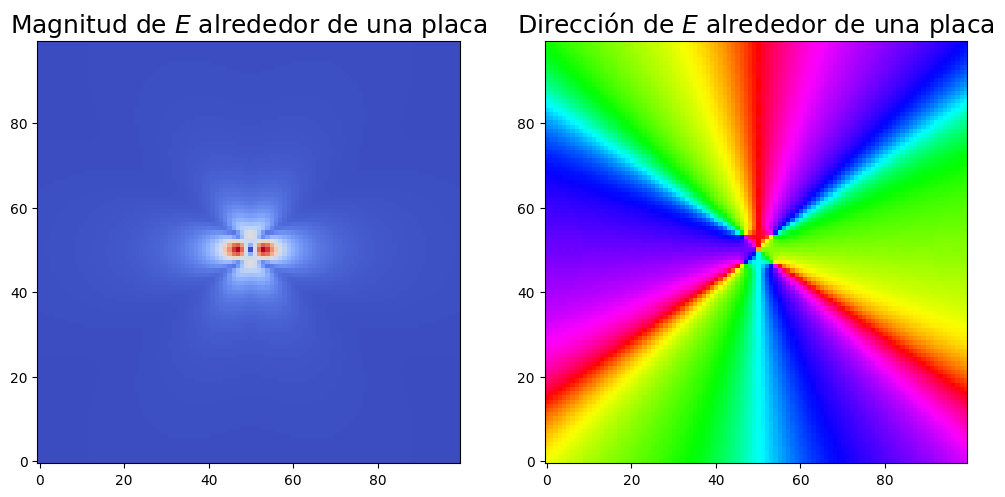

In [ ]:
# Usamos la cuadrataura gaussinada definida ejercicios atrás
def cuadgauss2(f,a,b,c,d,N):
    x,w = np.polynomial.legendre.leggauss(N)
    Wx = (1/2)*(b-a)*w
    Wy = (1/2)*(d-c)*w
    X = (1/2)*(b-a)*x + (1/2)*(b+a)
    Y = (1/2)*(d-c)*x + (1/2)*(d+c)
    s = 0
    m = 0
    for i in range(N):
      for j in range(N):
        s = s + Wx[i]*Wy[j]*f(X[i],Y[j])
    return s

# Definimos la función para calcular el potencial a una distancia x,y de
# la placa de 0.05m*0.05m
def V(x,y):
  L = 0.1 # =10cm
  e0 = 8.854e-12
  def f(x0,y0): # La función a integrar
    r = np.sqrt((x-x0)**2 + (y-y0)**2) +5
    sigma = 100*np.sin((2*np.pi*x0)/L)*np.sin((2*np.pi*y0)/L)
    return sigma/r
  return cuadgauss2(f,-L/2,L/2,-L/2,L/2,100) / (4*np.pi*e0)
# L/2 porque está centrado en el plano

xs = np.arange(-0.5,0.5,0.01) # 1cm = 0.01m
ys = np.arange(-0.5,0.5,0.01)
x,y = np.meshgrid(xs,ys)
Ex = -fx(V,x,y) # Usamos las mismas funciones para derivar del
Ey = -fy(V,x,y) # inciso pasado
ET_magnitud = np.sqrt(Ex**2+Ey**2)
ET_direccion = np.arctan2(Ey,Ex)

pl.figure(figsize=(12,10))
pl.subplot(121)
pl.title(r"Magnitud de $E$ alrededor de una placa",size=18)
pl.imshow(ET_magnitud,cmap='coolwarm',origin='lower')
pl.subplot(122)
pl.title(r"Dirección de $E$ alrededor de una placa",size=18)
pl.imshow(ET_direccion,cmap='hsv',origin='lower')

Text(0.5, 1.0, 'streamplot')

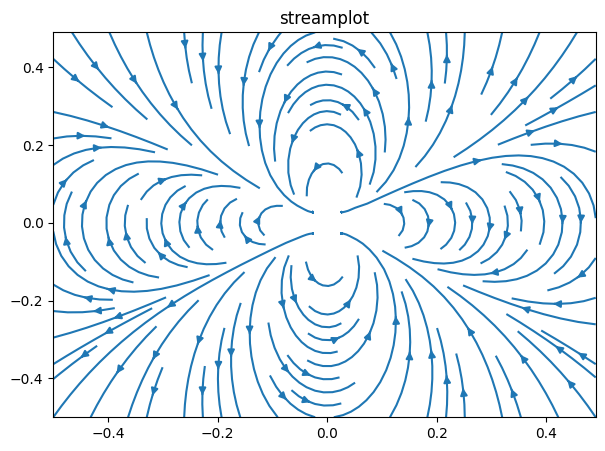

In [ ]:
# De la ayudantía:
fig, (ax1) = pl.subplots(1,figsize = (7,5))

ax1.streamplot(x,y,Ex,Ey)
ax1.set_title('streamplot')

#### **8. Procesamiento de imágenes y STM**: Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no solo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un ángulo $\theta$ con la normal, solo “ve” una fracción $\cos\theta$ de área por unidad de área real en la superficie:

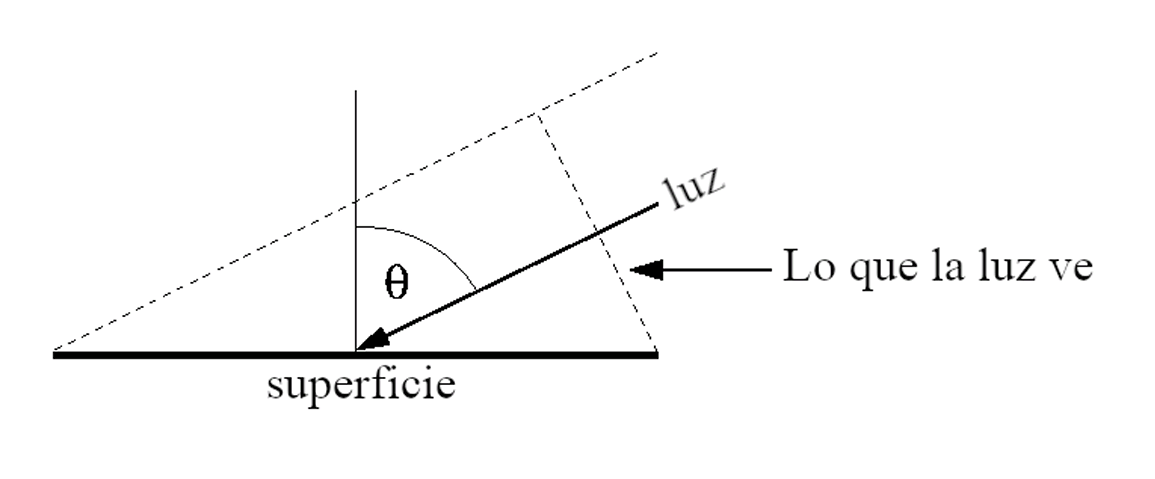

#### Así, la intensidad de la iluminación es $a \cos \theta$, si $a$ es la intensidad bruta de la luz. Esta simple ley física es un elemento central de los gráficos por computadora en 3D. Nos permite calcular cómo incide la luz sobre objetos tridimensionales y, por tanto, cómo se verán cuando se iluminen desde varios ángulos.

#### Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas. Conocemos la altura de las montañas $w(x, y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z = w(x, y)$, o equivalentemente $w(x, y) - z = 0$, y el vector normal $\vec{v}$ a la superficie está dado por el gradiente de $w(x, y) - z$ de la siguiente manera:

$$ \vec{v} = \nabla[w(x, y) - z] =
\begin{pmatrix}
\partial/\partial x \\
\partial/\partial y \\
\partial/\partial z
\end{pmatrix}
[w(x, y) - z] =
\begin{pmatrix}
\partial w / \partial x \\
\partial w / \partial y \\
-1
\end{pmatrix} $$

#### Ahora supongamos que tenemos luz entrante representada por un vector $\vec{a}$ con magnitud igual a la intensidad de la luz. Entonces, el producto escalar de los vectores $\vec{a}$ y $\vec{v}$ es:

$$ \vec{a} \cdot \vec{v} = |\vec{a}|\, |\vec{v}| \cos \theta $$

#### donde $\theta$ es el ángulo entre los vectores.

#### Entonces, la intensidad de la iluminación de la superficie de las montañas es:

$$ I = |\vec{a}| \cos \theta =
\frac{\vec{a} \cdot \vec{v}}{|\vec{v}|} =
\frac{a_x \left( \frac{\partial w}{\partial x} \right) + a_y \left( \frac{\partial w}{\partial y} \right) - a_z}
{\sqrt{ \left( \frac{\partial w}{\partial x} \right)^2 + \left( \frac{\partial w}{\partial y} \right)^2 + 1 }} $$

#### Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un ángulo $\phi$ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de modo que $\vec{a} = (\cos \phi, \sin \phi, 0)$. Entonces, nuestra intensidad de iluminación se simplifica a:

$$ I =
\frac{
\cos \phi \left( \frac{\partial w}{\partial x} \right) +
\sin \phi \left( \frac{\partial w}{\partial y} \right)
}{
\sqrt{ \left( \frac{\partial w}{\partial x} \right)^2 +
        \left( \frac{\partial w}{\partial y} \right)^2 + 1 }
} $$

#### Así, si podemos calcular las derivadas de la altura $w(x, y)$ y conocemos $\phi$, entonces podemos calcular la intensidad en cualquier punto.

#### **(a)** El archivo adjunto $\texttt{altitudes.txt}$ contiene la altitud $w(x, y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x, y)$. Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego, calcula las derivadas $\frac{\partial w}{\partial x}$ y $\frac{\partial w}{\partial y}$ en cada punto de la cuadrícula. Explica qué método utilizaste para calcularlas y por qué. (Hint: probablemente tendrás que usar más de un método para obtener cada punto de la cuadrícula porque suceden cosas incómodas en los bordes de la misma). Para calcular las derivadas, necesitarás saber el valor de $h$ y la distancia en metros entre puntos de la cuadrícula, que es de aproximadamente $30{,}000\,\mathrm{m}$ en este caso.


In [21]:
datos = pd.read_csv("altitudes.txt",sep=" ",header=None)
datos

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,-4116.06,-4114.78,-4113.87,-4113.03,-4112.70,-4112.27,-4112.11,-4112.01,-4112.07,-4112.11,...,-4141.21,-4138.20,-4134.96,-4131.75,-4128.53,-4125.50,-4122.67,-4120.08,-4117.81,NaN
1,-3969.33,-3959.20,-3949.72,-3940.94,-3932.66,-3925.15,-3918.41,-3912.29,-3906.86,-3901.25,...,-4078.51,-4070.07,-4060.02,-4048.22,-4035.00,-4021.12,-4007.06,-3993.46,-3980.39,NaN
2,-2652.85,-2647.95,-2648.86,-2652.46,-2656.44,-2660.45,-2663.77,-2661.80,-2650.29,-2630.93,...,-2856.47,-2837.43,-2817.39,-2796.81,-2775.24,-2749.38,-2720.04,-2691.39,-2666.93,NaN
3,-1883.71,-1905.99,-1936.42,-1961.11,-1976.96,-1988.88,-2003.14,-2024.60,-2050.64,-2077.34,...,-1948.28,-1955.93,-1964.40,-1967.09,-1960.89,-1949.11,-1931.89,-1906.31,-1884.07,NaN
4,-3741.14,-3760.53,-3777.54,-3787.33,-3793.26,-3800.72,-3810.69,-3819.63,-3824.05,-3826.50,...,-3455.78,-3483.16,-3520.27,-3564.67,-3610.08,-3657.75,-3697.18,-3717.27,-3727.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,3114.89,3114.70,3114.77,3114.68,3114.54,3114.68,3114.74,3114.57,3114.61,3114.38,...,3115.05,3115.11,3115.15,3115.07,3114.95,3114.82,3114.84,3114.94,3115.02,NaN
508,3065.53,3064.24,3063.02,3061.64,3060.38,3059.01,3057.60,3056.09,3054.69,3053.23,...,3075.16,3074.27,3073.31,3072.29,3071.26,3070.17,3069.11,3067.96,3066.81,NaN
509,2981.16,2979.56,2977.87,2976.23,2974.64,2972.92,2971.18,2969.27,2967.42,2965.60,...,2994.79,2993.41,2992.00,2990.52,2988.97,2987.54,2986.03,2984.54,2982.82,NaN
510,2897.12,2896.19,2895.30,2894.24,2893.31,2892.41,2891.40,2890.58,2889.68,2888.77,...,2906.39,2905.33,2904.28,2903.29,2902.20,2901.19,2900.22,2899.22,2898.19,NaN


La última columna tiene puros NaN, así que lo quitamos.

In [22]:
datos = datos.iloc[:,:-1]
datos

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-4116.06,-4114.78,-4113.87,-4113.03,-4112.70,-4112.27,-4112.11,-4112.01,-4112.07,-4112.11,...,-4144.00,-4141.21,-4138.20,-4134.96,-4131.75,-4128.53,-4125.50,-4122.67,-4120.08,-4117.81
1,-3969.33,-3959.20,-3949.72,-3940.94,-3932.66,-3925.15,-3918.41,-3912.29,-3906.86,-3901.25,...,-4085.48,-4078.51,-4070.07,-4060.02,-4048.22,-4035.00,-4021.12,-4007.06,-3993.46,-3980.39
2,-2652.85,-2647.95,-2648.86,-2652.46,-2656.44,-2660.45,-2663.77,-2661.80,-2650.29,-2630.93,...,-2873.07,-2856.47,-2837.43,-2817.39,-2796.81,-2775.24,-2749.38,-2720.04,-2691.39,-2666.93
3,-1883.71,-1905.99,-1936.42,-1961.11,-1976.96,-1988.88,-2003.14,-2024.60,-2050.64,-2077.34,...,-1942.94,-1948.28,-1955.93,-1964.40,-1967.09,-1960.89,-1949.11,-1931.89,-1906.31,-1884.07
4,-3741.14,-3760.53,-3777.54,-3787.33,-3793.26,-3800.72,-3810.69,-3819.63,-3824.05,-3826.50,...,-3434.05,-3455.78,-3483.16,-3520.27,-3564.67,-3610.08,-3657.75,-3697.18,-3717.27,-3727.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,3114.89,3114.70,3114.77,3114.68,3114.54,3114.68,3114.74,3114.57,3114.61,3114.38,...,3115.07,3115.05,3115.11,3115.15,3115.07,3114.95,3114.82,3114.84,3114.94,3115.02
508,3065.53,3064.24,3063.02,3061.64,3060.38,3059.01,3057.60,3056.09,3054.69,3053.23,...,3076.18,3075.16,3074.27,3073.31,3072.29,3071.26,3070.17,3069.11,3067.96,3066.81
509,2981.16,2979.56,2977.87,2976.23,2974.64,2972.92,2971.18,2969.27,2967.42,2965.60,...,2996.17,2994.79,2993.41,2992.00,2990.52,2988.97,2987.54,2986.03,2984.54,2982.82
510,2897.12,2896.19,2895.30,2894.24,2893.31,2892.41,2891.40,2890.58,2889.68,2888.77,...,2907.31,2906.39,2905.33,2904.28,2903.29,2902.20,2901.19,2900.22,2899.22,2898.19


In [23]:
datos = datos.to_numpy()
datos

array([[-4116.06, -4114.78, -4113.87, ..., -4122.67, -4120.08, -4117.81],
       [-3969.33, -3959.2 , -3949.72, ..., -4007.06, -3993.46, -3980.39],
       [-2652.85, -2647.95, -2648.86, ..., -2720.04, -2691.39, -2666.93],
       ...,
       [ 2981.16,  2979.56,  2977.87, ...,  2986.03,  2984.54,  2982.82],
       [ 2897.12,  2896.19,  2895.3 , ...,  2900.22,  2899.22,  2898.19],
       [ 2785.31,  2785.22,  2785.14, ...,  2785.62,  2785.57,  2785.44]])

In [24]:
h = 30000
wx = np.zeros_like(datos)
wy = np.zeros_like(datos)

# En los extremos lo hacemos por diferencia hacia atrás y adelante,
# porque no podriamos agarrar los dos puntos de alrededor
# Los demás daros sí por diferencia central
wy[1:-1, :] = (datos[2:, :] - datos[:-2, :]) / (2 * h)
wy[0, :] = (datos[1, :] - datos[0, :]) / h
wy[-1, :] = (datos[-1, :] - datos[-2, :]) / h

wx[:, 1:-1] = (datos[:, 2:] - datos[:, :-2]) / (2 * h)
wx[:, 0] = (datos[:, 1] - datos[:, 0]) / h
wx[:, -1] = (datos[:, -1] - datos[:, -2]) / h

#### **(b)** Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $\phi = 45^\circ$, y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto dependa del correspondiente valor de intensidad. Si lo haces funcionar correctamente, la gráfica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D. (Algunos de los problemas comunes al hacer esto pueden ser: un mapa que está al revés o de lado, o un mapa en el que el relieve está “de adentro hacia afuera”, lo que significa que las regiones altas se ven bajas y viceversa. Trabaja con los detalles de tu programa hasta que obtengas un mapa que te parezca adecuado.) Hint: Ten en cuenta que el valor de la intensidad $I$ de la fórmula anterior puede ser positivo o negativo; oscila entre $+1$ y $-1$. ¿Qué significa una intensidad negativa? Significa que el área en cuestión está en sombras (es decir, que se encuentra en el lado equivocado de la montaña para recibir alguna luz). Podrías representar esto coloreando esas áreas del mapa completamente de negro, aunque en la práctica obtendrás una imagen más bonita (aunque tal vez menos realista) simplemente usando una gama continua de grises desde $+1$ hasta $-1$.


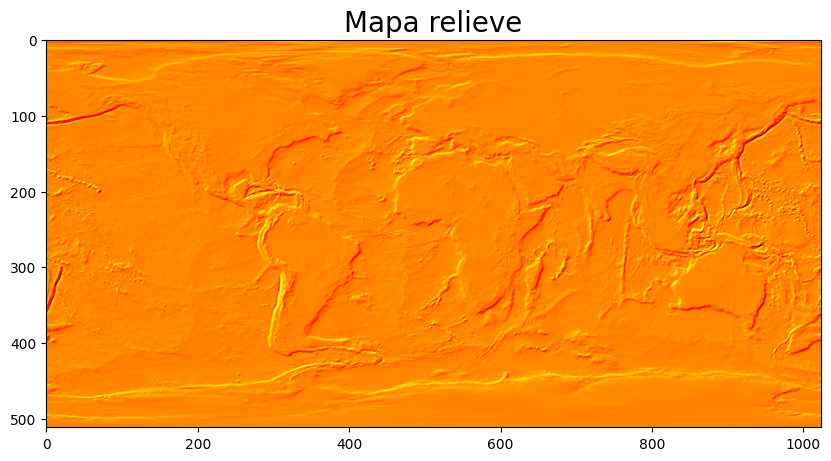

In [27]:
def I2(wx,wy,phi):
  a = np.cos(phi)*wx + np.sin(phi)*wy
  b = np.sqrt(wx**2 + wy**2 + 1)
  return a/b

pl.figure(figsize=(10,10))
pl.title("Mapa relieve",fontsize=20)
pl.imshow(I2(wx,wy,np.pi/4),cmap='hot')

#### **(c)** El archivo adjunto $\texttt{stm.txt}$ contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel (Scanning Tunneling Microscope o STM) de la superficie (111) del silicio. Un microscopio de efecto túnel (STM) es un dispositivo que mide la forma de superficies a nivel atómico, siguiendo una punta afilada sobre la superficie y midiendo la corriente de efecto túnel cuántico en función de la posición. El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición, y los datos del archivo $\texttt{stm.txt}$ contienen precisamente esa rejilla de valores. Modifica tu programa anterior para visualizar los datos STM y así crear una imagen 3D de cómo se ve la superficie de silicio. El valor de $h$ para las derivadas en este caso es de alrededor de $h = 2.5$ (en unidades arbitrarias).


In [ ]:
datos2 = pd.read_csv("stm.txt",sep=" ",header=None)
datos2

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,675
0,24.28,26.41,28.71,30.84,32.26,32.97,33.32,33.32,33.50,33.50,...,24.99,24.99,24.99,24.99,25.17,25.35,25.70,25.88,26.06,25.88
1,23.93,26.06,28.36,30.49,31.90,32.61,32.97,33.14,33.32,33.32,...,24.64,24.64,24.64,24.64,24.81,24.99,25.35,25.70,25.70,25.52
2,23.22,25.52,27.83,29.95,31.37,32.26,32.61,32.79,32.97,33.14,...,24.11,24.11,24.11,24.28,24.46,24.64,24.99,25.35,25.52,25.17
3,22.51,24.81,27.47,29.60,31.02,31.73,32.08,32.26,32.61,32.79,...,23.57,23.57,23.57,23.75,23.75,24.11,24.64,24.81,24.99,24.81
4,21.80,24.28,26.94,29.25,30.66,31.37,31.73,31.90,32.08,32.44,...,22.86,22.86,23.04,23.04,23.22,23.57,24.11,24.28,24.46,24.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,13.29,13.83,14.36,14.53,14.71,14.53,14.18,14.00,13.65,13.47,...,13.65,13.83,14.00,14.00,14.18,14.36,14.53,14.71,14.89,14.89
659,13.29,13.65,14.18,14.53,14.53,14.36,14.18,14.00,13.65,13.29,...,14.18,14.36,14.53,14.71,14.89,15.07,15.24,15.60,15.60,15.60
660,13.12,13.65,14.18,14.53,14.53,14.36,14.00,13.83,13.47,13.12,...,14.89,15.07,15.24,15.24,15.42,15.77,15.95,16.31,16.31,16.31
661,13.12,13.65,14.18,14.36,14.36,14.18,14.00,13.65,13.29,12.94,...,15.42,15.60,15.77,15.95,15.95,16.31,16.66,16.84,17.02,16.84


In [ ]:
datos2 = datos2.to_numpy()  # o también .values

In [ ]:
h = 2.5
ny, nx = datos2.shape
dy = np.zeros_like(datos2)


# Parte central con diferencia centrada
dy[1:-1, :] = (datos2[2:, :] - datos2[:-2, :]) / (2 * h)

# Bordes
dy[0, :] = (datos2[1, :] - datos2[0, :]) / h
dy[-1, :] = (datos2[-1, :] - datos2[-2, :]) / h

dx = np.zeros_like(datos2)

# Parte central con diferencia centrada
dx[:, 1:-1] = (datos2[:, 2:] - datos2[:, :-2]) / (2 * h)

# Bordes
dx[:, 0] = (datos2[:, 1] - datos2[:, 0]) / h
dx[:, -1] = (datos2[:, -1] - datos2[:, -2]) / h

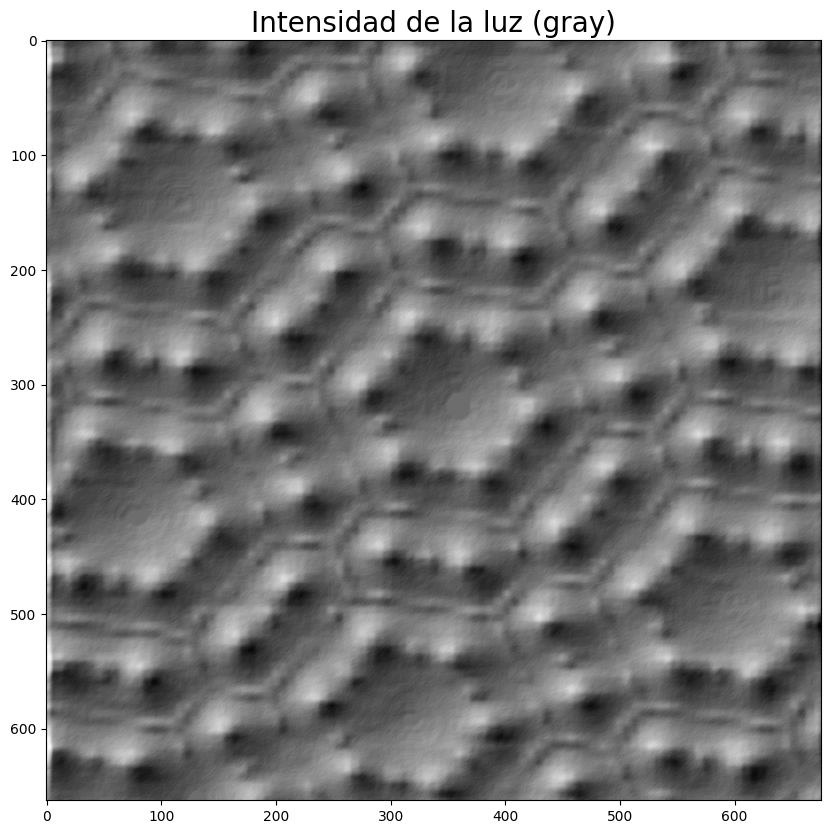

In [ ]:
# def I2(wx,wy,phi):
#   a = np.cos(phi)*wx + np.sin(phi)*wy
#   b = np.sqrt(wx**2 + wy**2 + 1)
#   return a/b

graf = I2(dx,dy,np.pi/4)

pl.figure(figsize=(10,10))
pl.title("Intensidad de la luz (gray)",fontsize=20)
pl.imshow(graf,cmap='gray')